In [6]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importer les datasets
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [4]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:

control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [8]:
# valeurs manquantes 
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [9]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [10]:
# Remplacer les valeurs manquantes par la moyenne
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

In [11]:
# fusionner les deux datasets
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)

C:\Users\BILLO\AppData\Local\Temp\ipykernel_3300\3592319081.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data,


In [12]:
# Afficher l'entete de donnée
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [13]:
ab_data.shape

(60, 10)

In [14]:
ab_data['Campaign Name'].value_counts()

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


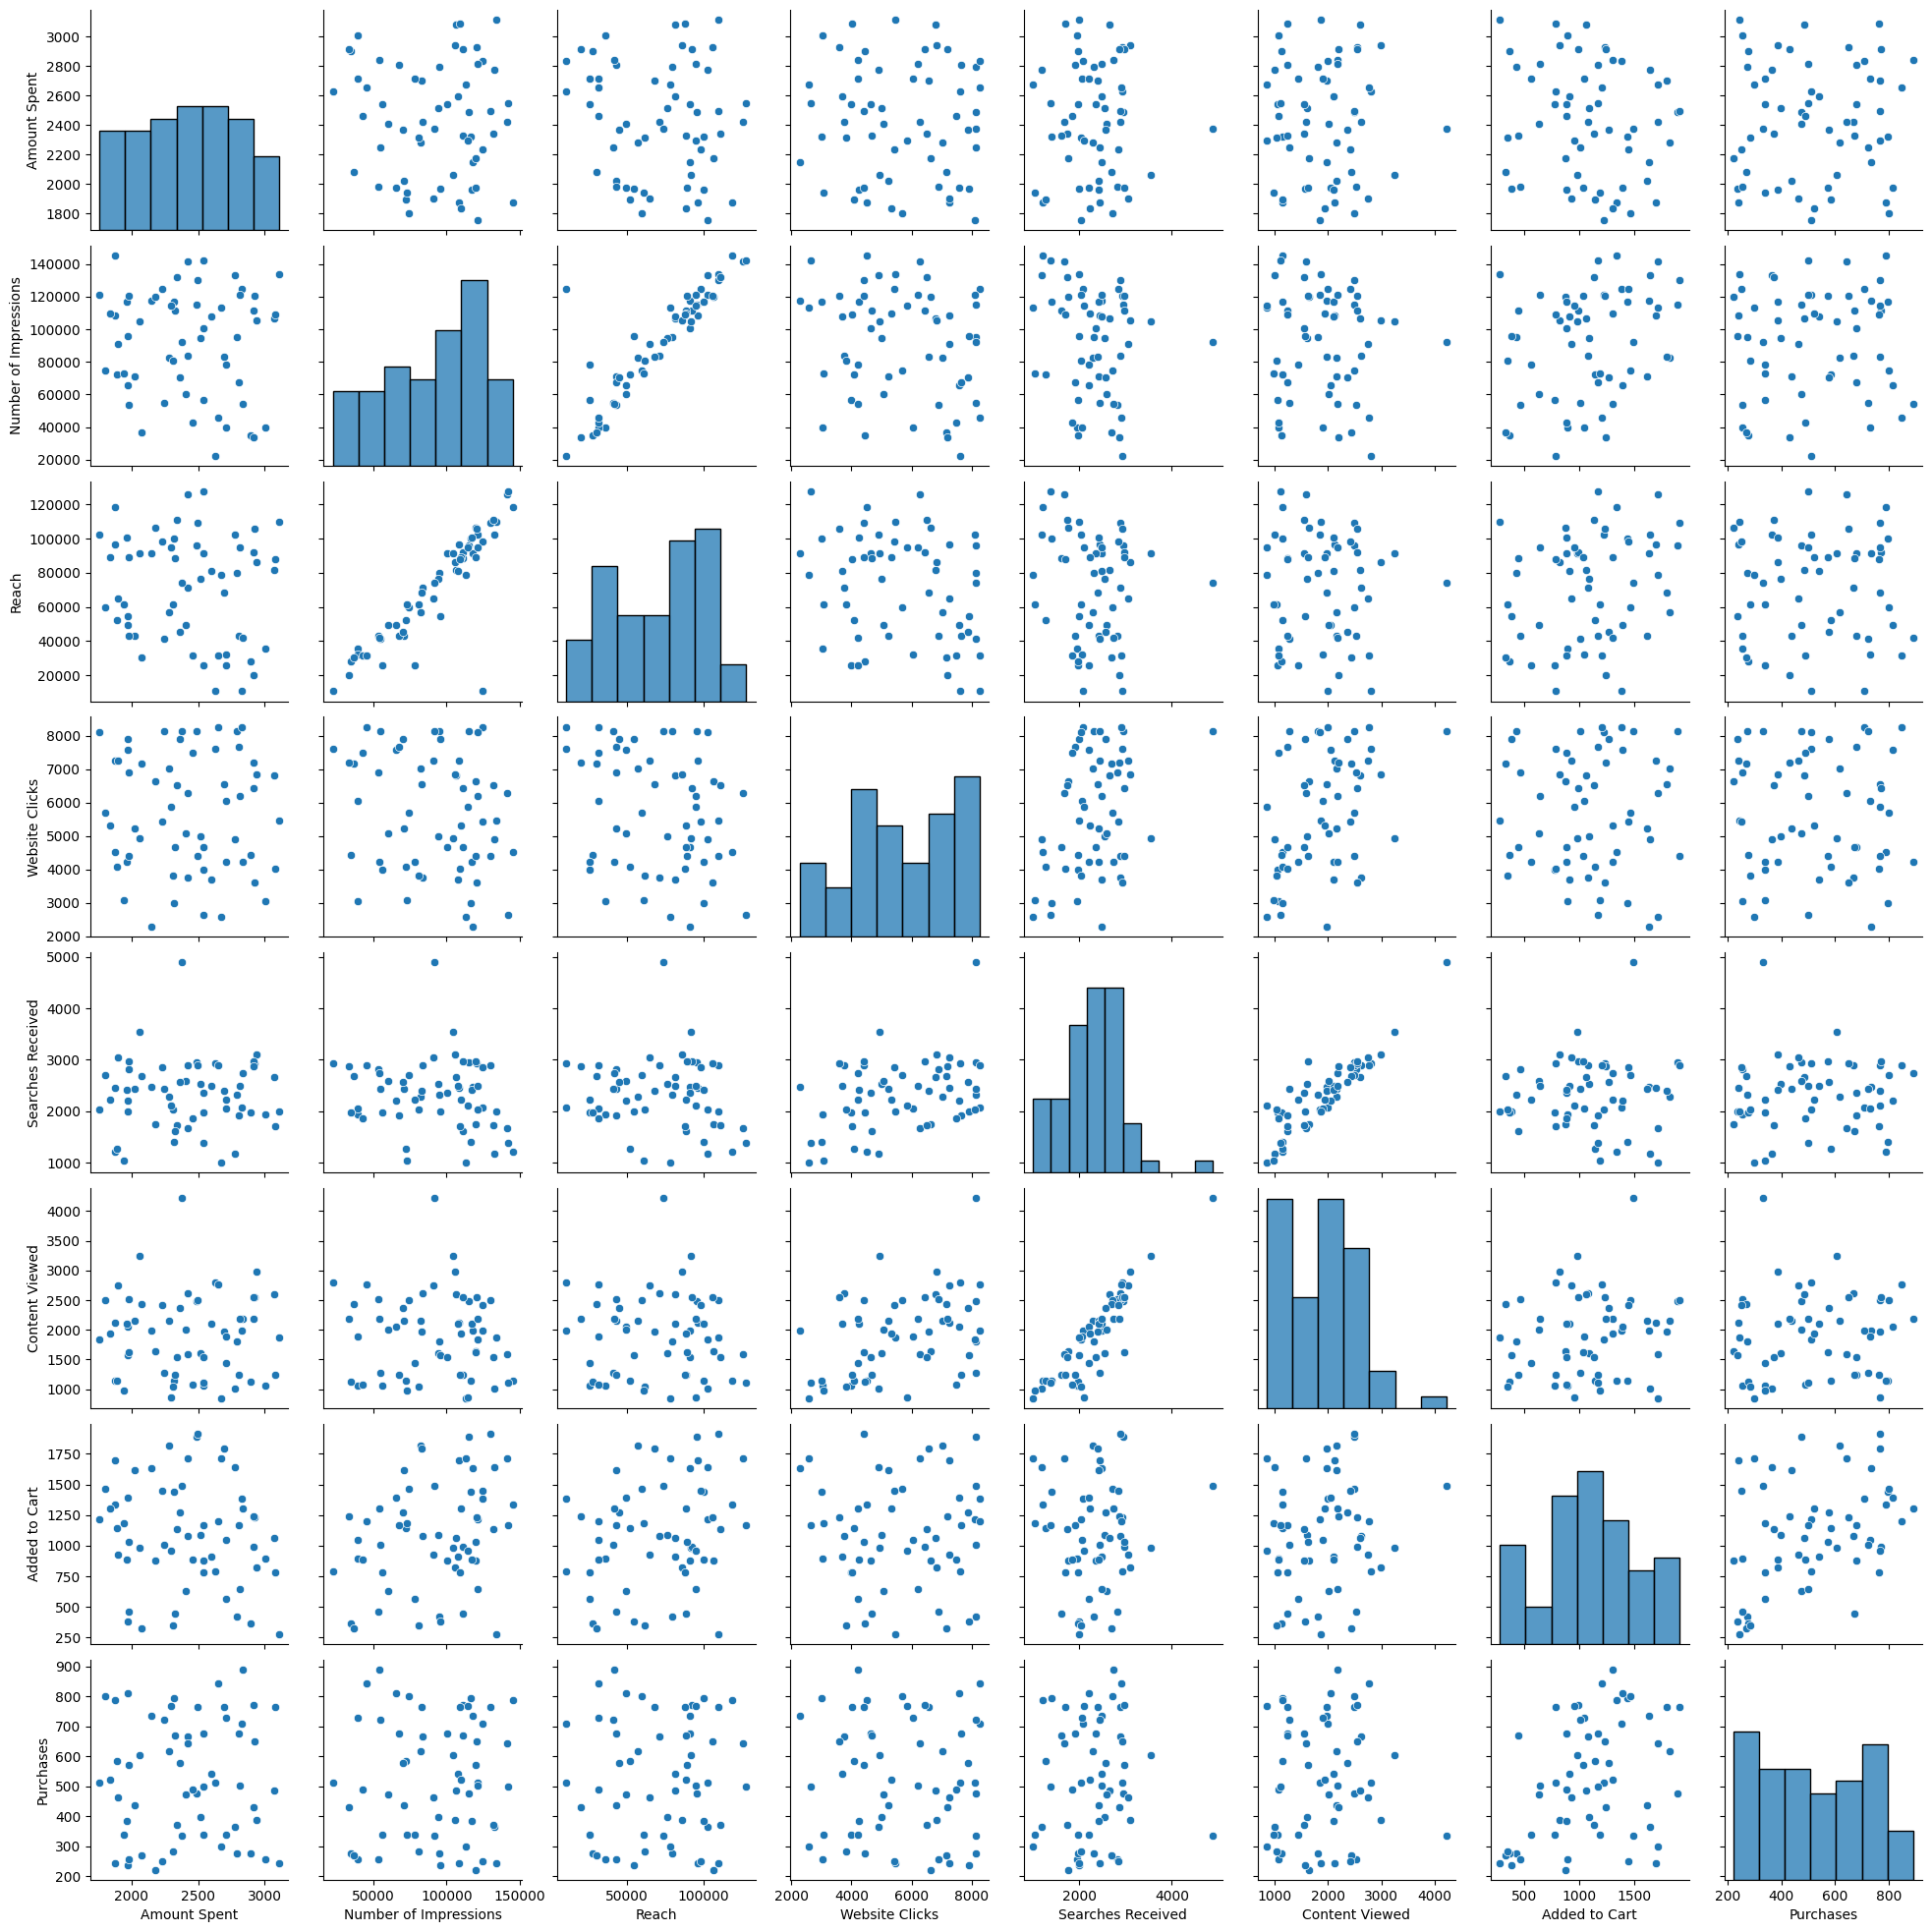

In [16]:
# relation entre les deux campagnes 
sns.pairplot(ab_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


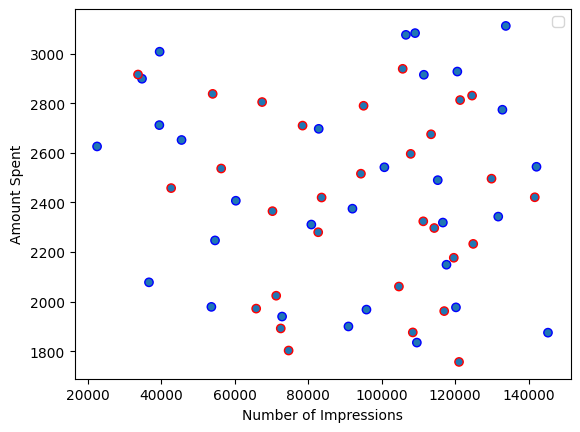

In [37]:
plt.scatter(x=ab_data['Number of Impressions'],y=ab_data['Amount Spent'],edgecolors=['Red','blue'])
plt.xlabel('Number of Impressions')
plt.ylabel('Amount Spent')
plt.legend()

In [39]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]